In [1]:
import math
import collections
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.options.display.max_rows = 10

In [7]:
path = os.getcwd()
path

'C:\\Users\\Nasim\\Documents\\Heriot Watt Uni\\Dissertation\\Analysis'

In [738]:
incident_df_all = pd.read_excel('Incident Flagged Data\\gtggungs2010toPresent.xlsx', sheet_name='gtggungs2010toPresent')

In [739]:
item_involved = ['PIPE']

In [740]:
incident_df = incident_df_all.loc[(incident_df_all['SYSTEM_TYPE'] == 'GT (Gas Transmission)') & (incident_df_all['IYEAR'] != 2021) & (incident_df_all['ON_OFF_SHORE'] == 'ONSHORE') & (incident_df_all['SYSTEM_PART_INVOLVED'] == 'ONSHORE PIPELINE, INCLUDING VALVE SITES') & (incident_df_all['ITEM_INVOLVED'].isin(item_involved))]

In [741]:
incident_df = incident_df.set_index('IYEAR')

In [655]:
incident_df['MAP_CAUSE'].value_counts(ascending=False)

EXCAVATION DAMAGE              146
CORROSION                      105
MATERIAL/WELD/EQUIP FAILURE     97
NATURAL FORCE DAMAGE            30
OTHER OUTSIDE FORCE DAMAGE      22
ALL OTHER CAUSES                18
INCORRECT OPERATION              8
Name: MAP_CAUSE, dtype: int64

In [656]:
incident_df['MAP_CAUSE'].describe()

count                   426
unique                    7
top       EXCAVATION DAMAGE
freq                    146
Name: MAP_CAUSE, dtype: object

In [99]:
cause_percent = pd.DataFrame()

In [657]:
cause_percent = incident_df['MAP_CAUSE'].value_counts(normalize=True)[:]*100

In [658]:
cause_percent

EXCAVATION DAMAGE              34.272300
CORROSION                      24.647887
MATERIAL/WELD/EQUIP FAILURE    22.769953
NATURAL FORCE DAMAGE            7.042254
OTHER OUTSIDE FORCE DAMAGE      5.164319
ALL OTHER CAUSES                4.225352
INCORRECT OPERATION             1.877934
Name: MAP_CAUSE, dtype: float64

In [659]:
incident_df['MAP_SUBCAUSE'].value_counts(normalize=True)[:]*100

THIRD PARTY EXCAVATION DAMAGE                        26.995305
EXTERNAL                                             17.840376
CONSTRUCTION, INSTALLATION OR FABRICATION-RELATED     8.685446
MANUFACTURING-RELATED                                 7.276995
INTERNAL                                              6.807512
                                                       ...    
TEMPERATURE                                           0.234742
PREVIOUS MECHANICAL DAMAGE                            0.234742
ELECTRICAL ARCING FROM OTHER EQUIPMENT/FACILITY       0.234742
PIPELINE/EQUIPMENT OVERPRESSURED                      0.234742
MALFUNCTION OF CONTROL/RELIEF EQUIPMENT               0.234742
Name: MAP_SUBCAUSE, Length: 28, dtype: float64

In [660]:
corrosion_int_ext = incident_df.loc[incident_df['MAP_CAUSE'] == 'CORROSION']['MAP_SUBCAUSE'].value_counts(normalize=True)[:]*100
corrosion_int_ext

EXTERNAL    72.380952
INTERNAL    27.619048
Name: MAP_SUBCAUSE, dtype: float64

In [661]:
incident_df.loc[incident_df['MAP_CAUSE'] == 'EXCAVATION DAMAGE']['MAP_SUBCAUSE'].value_counts(normalize=True)

THIRD PARTY EXCAVATION DAMAGE            0.787671
OPERATOR/CONTRACTOR EXCAVATION DAMAGE    0.109589
PREVIOUS DAMAGE DUE TO EXCAVATION        0.102740
Name: MAP_SUBCAUSE, dtype: float64

In [662]:
incident_df.loc[incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE']['MAP_SUBCAUSE'].value_counts(normalize=True)

CONSTRUCTION, INSTALLATION OR FABRICATION-RELATED    0.381443
MANUFACTURING-RELATED                                0.319588
ENVIRONMENTAL CRACKING-RELATED                       0.268041
OTHER EQUIPMENT FAILURE                              0.020619
MALFUNCTION OF CONTROL/RELIEF EQUIPMENT              0.010309
Name: MAP_SUBCAUSE, dtype: float64

In [811]:
cause_percent = cause_percent[['EXCAVATION DAMAGE', 'CORROSION', 'MATERIAL/WELD/EQUIP FAILURE',
       'NATURAL FORCE DAMAGE', 'OTHER OUTSIDE FORCE DAMAGE', 'INCORRECT OPERATION', 'ALL OTHER CAUSES']]

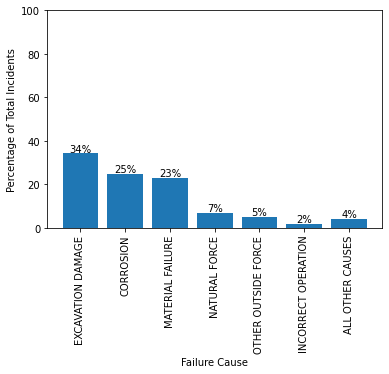

In [816]:
#Stacked bar graph
#cause_percent.plot(kind = 'bar', stacked = True, mark_right = True)

n = len(cause_percent.index)
x = np.arange(n)

labels = ['EXCAVATION DAMAGE', 'CORROSION', 'MATERIAL FAILURE',
       'NATURAL FORCE', 'OTHER OUTSIDE FORCE', 'INCORRECT OPERATION', 'ALL OTHER CAUSES']
windth = 10
fig, ax = plt.subplots()

a = ax.bar(x, cause_percent.values , align = 'center' ) 

#xticks 
plt.xticks(x, labels , rotation=70) 

#x-axis labels 
plt.xlabel('Failure Cause') 


#y-axis labels 
plt.ylabel('Percentage of Total Incidents') 
plt.ylim(top=100)

#plot title 
#plt.title('Ditribution of Incidents by Cause') 

#Legend
#plt.legend(['Cause'],bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\Cause_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

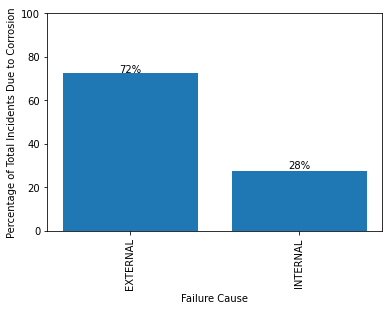

In [664]:
#Stacked bar graph
#corrosion_int_ext.plot(kind = 'bar', stacked = True, mark_right = True)

windth = 10
fig, ax = plt.subplots()

a = ax.bar(corrosion_int_ext.index,corrosion_int_ext.values , align = 'center' ) 

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Failure Cause') 


#y-axis labels 
plt.ylabel('Percentage of Total Incidents Due to Corrosion') 
plt.ylim(top=100)

#plot title 
#plt.title('Ditribution of Incidents Due to Corrosion by Sub-Cause') 

#Legend
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\Corrosion_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [665]:
incident_df['MATERIAL_INVOLVED'].value_counts()

CARBON STEEL                                   425
MATERIAL OTHER THAN CARBON STEEL OR PLASTIC      1
Name: MATERIAL_INVOLVED, dtype: int64

In [666]:
incident_df['CLASS_LOCATION_TYPE'].value_counts()

CLASS 1 LOCATION    327
CLASS 3 LOCATION     66
CLASS 2 LOCATION     31
CLASS 4 LOCATION      2
Name: CLASS_LOCATION_TYPE, dtype: int64

In [667]:
class_percent = incident_df['CLASS_LOCATION_TYPE'].value_counts(normalize=True)[:]*100
class_percent = class_percent[['CLASS 1 LOCATION', 'CLASS 2 LOCATION', 'CLASS 3 LOCATION', 'CLASS 4 LOCATION']]
class_percent

CLASS 1 LOCATION    76.760563
CLASS 2 LOCATION     7.276995
CLASS 3 LOCATION    15.492958
CLASS 4 LOCATION     0.469484
Name: CLASS_LOCATION_TYPE, dtype: float64

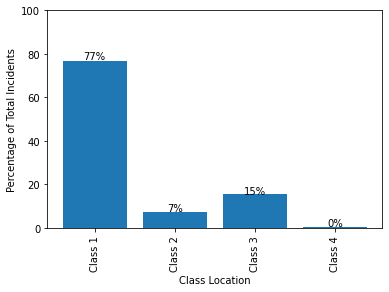

In [817]:
#Stacked bar graph
#class_percent.plot(kind = 'bar', stacked = True, mark_right = True)

n = len(class_percent.index)

x = np.arange(n)

labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4']

windth = 10
fig, ax = plt.subplots()

a = ax.bar(x,class_percent.values , align = 'center' ) 

#xticks 
plt.xticks(x, labels, rotation=90) 

#x-axis labels 
plt.xlabel('Class Location') 


#y-axis labels 
plt.ylabel('Percentage of Total Incidents') 
plt.ylim(top=100)

#plot title 
#plt.title('Ditribution of Incidents by Class Location') 

#Legend
#plt.legend(['Class Location'],bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\Class_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [669]:
incident_df['PIPE_DIAMETER'].describe()

count    426.000000
mean      15.587148
std        9.180770
min        0.500000
25%        8.000000
50%       12.750000
75%       22.000000
max       42.000000
Name: PIPE_DIAMETER, dtype: float64

In [742]:
incident_df['Installation_Decade'] = 'Unknown'
incident_df['Diameter_Range'] = None
incident_df['SMYS_Range'] = None

#setting diameter categories
incident_df.loc[incident_df['PIPE_DIAMETER'] <= 4, 'Diameter_Range'] = 'd<=4'
incident_df.loc[(incident_df['PIPE_DIAMETER'] > 4) & (incident_df['PIPE_DIAMETER'] <=10), 'Diameter_Range'] = '4<d<=10'
incident_df.loc[(incident_df['PIPE_DIAMETER'] > 10) & (incident_df['PIPE_DIAMETER'] <=20), 'Diameter_Range'] = '10<d<=20'
incident_df.loc[(incident_df['PIPE_DIAMETER'] > 20) & (incident_df['PIPE_DIAMETER'] <=28), 'Diameter_Range'] = '20<d<=28'
incident_df.loc[incident_df['PIPE_DIAMETER'] > 28, 'Diameter_Range'] = '28<d'

#change installation year to float
incident_df.loc[incident_df['INSTALLATION_YEAR'] == 'UNKNOWN', 'INSTALLATION_YEAR'] = None
pd.to_numeric(incident_df['INSTALLATION_YEAR'])

#setting Installation Decade
incident_df.loc[incident_df['INSTALLATION_YEAR'] < 1940, 'Installation_Decade'] = 'Pre 1940'
incident_df.loc[(incident_df['INSTALLATION_YEAR'] >= 1940) & (incident_df['INSTALLATION_YEAR'] <1950), 'Installation_Decade'] = '1940s'
incident_df.loc[(incident_df['INSTALLATION_YEAR'] >= 1950) & (incident_df['INSTALLATION_YEAR'] <1960), 'Installation_Decade'] = '1950s'
incident_df.loc[(incident_df['INSTALLATION_YEAR'] >= 1960) & (incident_df['INSTALLATION_YEAR'] <1970), 'Installation_Decade'] = '1960s'
incident_df.loc[(incident_df['INSTALLATION_YEAR'] >= 1970) & (incident_df['INSTALLATION_YEAR'] <1980), 'Installation_Decade'] = '1970s'
incident_df.loc[(incident_df['INSTALLATION_YEAR'] >= 1980) & (incident_df['INSTALLATION_YEAR'] <1990), 'Installation_Decade'] = '1980s'
incident_df.loc[(incident_df['INSTALLATION_YEAR'] >= 1990) & (incident_df['INSTALLATION_YEAR'] <2000), 'Installation_Decade'] = '1990s'
incident_df.loc[(incident_df['INSTALLATION_YEAR'] >= 2000) & (incident_df['INSTALLATION_YEAR'] <2010), 'Installation_Decade'] = '2000s'
incident_df.loc[(incident_df['INSTALLATION_YEAR'] >= 2010) & (incident_df['INSTALLATION_YEAR'] <2020), 'Installation_Decade'] = '2010s'
incident_df.loc[(incident_df['INSTALLATION_YEAR'] >= 2020) , 'Installation_Decade'] = '2020s'

In [743]:
incident_df['Installation_Decade'].describe()

count       426
unique       10
top       1960s
freq        115
Name: Installation_Decade, dtype: object

In [744]:
# Calculating percentages and Rearrangin columns for a better looking graph
installation_percent = incident_df['Installation_Decade'].value_counts(normalize=True)[:]*100
installation_percent['2020s'] = 0
installation_percent = installation_percent[['Pre 1940', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s','2020s' ,'Unknown']]
installation_percent

Pre 1940     6.572770
1940s       12.910798
1950s       26.760563
1960s       26.995305
1970s       10.563380
              ...    
1990s        3.990610
2000s        1.408451
2010s        2.582160
2020s        0.000000
Unknown      2.112676
Name: Installation_Decade, Length: 11, dtype: float64

In [745]:
# Calculating percentages and Rearrangin columns for a better looking graph
diameter_percent = incident_df['Diameter_Range'].value_counts(normalize=True)[:]*100
diameter_percent = diameter_percent[['d<=4', '4<d<=10', '10<d<=20','20<d<=28', '28<d']]
diameter_percent

d<=4        10.093897
4<d<=10     25.352113
10<d<=20    38.262911
20<d<=28    13.145540
28<d        13.145540
Name: Diameter_Range, dtype: float64

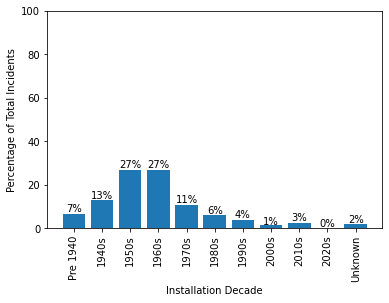

In [746]:
#Stacked bar graph
#installation_percent.plot(kind = 'bar', stacked = True, mark_right = True)

windth = 10
fig, ax = plt.subplots()

a = ax.bar(installation_percent.index,installation_percent.values , align = 'center' ) 


#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Installation Decade') 


#y-axis labels 
plt.ylabel('Percentage of Total Incidents') 
plt.ylim(top=100)


#plot title 
#plt.title('Ditribution of Incidents by Installation Year') 

#Legend
#plt.legend(['Installation Decade'],bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\Installation_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

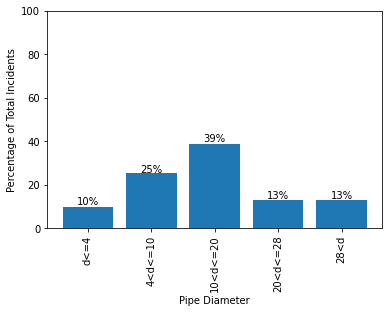

In [675]:
#Stacked bar graph
#diameter_percent.plot(kind = 'bar', stacked = True, mark_right = True)

windth = 10
fig, ax = plt.subplots()

a = ax.bar(diameter_percent.index,diameter_percent.values , align = 'center' ) 

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Pipe Diameter') 


#y-axis labels 
plt.ylabel('Percentage of Total Incidents') 
plt.ylim(top=100)


#plot title 
#plt.title('Ditribution of Incidents by Pipe Diameter') 

#Legend
#plt.legend(['Pipe Diameter'],bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\Diameter_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [747]:
#assigning unknown to blank cells for commodity
incident_df.loc[incident_df['COMMODITY_RELEASED_TYPE'].isnull(),'COMMODITY_RELEASED_TYPE'] = 'Unknown'
incident_df.loc[incident_df['COMMODITY_RELEASED_TYPE'] == 'Unknown']['COMMODITY_RELEASED_TYPE']

IYEAR
2012    Unknown
2012    Unknown
2012    Unknown
2014    Unknown
2015    Unknown
2018    Unknown
Name: COMMODITY_RELEASED_TYPE, dtype: object

In [748]:
commodity_percent = incident_df['COMMODITY_RELEASED_TYPE'].value_counts(normalize=True)[:]*100
commodity_percent = commodity_percent[['NATURAL GAS', 'HYDROGEN GAS', 'OTHER GAS', 'Unknown']]
commodity_percent

NATURAL GAS     97.183099
HYDROGEN GAS     0.469484
OTHER GAS        0.938967
Unknown          1.408451
Name: COMMODITY_RELEASED_TYPE, dtype: float64

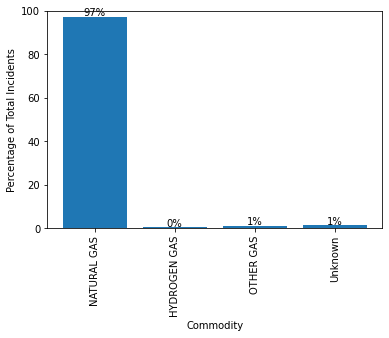

In [749]:
#Stacked bar graph
#commodity_percent.plot(kind = 'bar', stacked = True, mark_right = True)

windth = 10
fig, ax = plt.subplots()

a = ax.bar(commodity_percent.index,commodity_percent.values , align = 'center' ) 

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Commodity') 


#y-axis labels 
plt.ylabel('Percentage of Total Incidents') 
plt.ylim(top=100)


#plot title 
#plt.title('Ditribution of Incidents by Commodity') 

#Legend
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\Commodity_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [750]:
#calculating SMYS
incident_df['Hoop_Stress'] = None
incident_df['SMYS%'] = None
incident_df['Hoop_Stress'] = (incident_df['MOP_PSIG']*incident_df['PIPE_DIAMETER'])/(2*incident_df['PIPE_WALL_THICKNESS'])
incident_df['SMYS%'] = (incident_df['Hoop_Stress']/incident_df['PIPE_SMYS'])

In [751]:
#Creating SMYS ranges
incident_df['SMYS_Cat'] = None

incident_df.loc[incident_df['SMYS%'] <= 0.2, 'SMYS_Cat'] = 'Less than 20%'
incident_df.loc[(incident_df['SMYS%'] > 0.2) & (incident_df['SMYS%'] <=0.3), 'SMYS_Cat'] = '20%-30%'
incident_df.loc[(incident_df['SMYS%'] > 0.3) & (incident_df['SMYS%'] <=0.4), 'SMYS_Cat'] = '30%-40%'
incident_df.loc[(incident_df['SMYS%'] > 0.4) & (incident_df['SMYS%'] <=0.5), 'SMYS_Cat'] = '40%-50%'
incident_df.loc[(incident_df['SMYS%'] > 0.5) & (incident_df['SMYS%'] <=0.6), 'SMYS_Cat'] = '50%-60%'
incident_df.loc[(incident_df['SMYS%'] > 0.6) & (incident_df['SMYS%'] <=0.72), 'SMYS_Cat'] = '60%-72%'
incident_df.loc[(incident_df['SMYS%'] > 0.72) & (incident_df['SMYS%'] <=0.8), 'SMYS_Cat'] = '72%-80%'
incident_df.loc[(incident_df['SMYS%'] > 0.8) & (incident_df['SMYS%'] <=1), 'SMYS_Cat'] = 'Greater than 80%'
incident_df.loc[incident_df['SMYS%'].isnull(), 'SMYS_Cat'] = 'Unknown'
incident_df.loc[(incident_df['SMYS%'] > 1), 'SMYS_Cat'] = 'Unknown'

In [752]:
#Calculating SMYS percentages for plotting
smys_percent = incident_df['SMYS_Cat'].value_counts(normalize=True)[:]*100
smys_percent['Greater than 80%'] = 0
smys_percent = smys_percent[['Less than 20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-72%', '72%-80%', 'Greater than 80%', 'Unknown']]
smys_percent

Less than 20%       12.676056
20%-30%             15.258216
30%-40%             11.502347
40%-50%             14.788732
50%-60%             13.615023
60%-72%             24.413146
72%-80%              4.225352
Greater than 80%     0.000000
Unknown              3.521127
Name: SMYS_Cat, dtype: float64

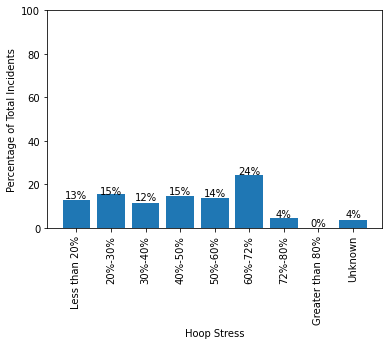

In [753]:
#Stacked bar graph
#smys_percent.plot(kind = 'bar', stacked = True, mark_right = True)

windth = 10
fig, ax = plt.subplots()

a = ax.bar(smys_percent.index,smys_percent.values , align = 'center' ) 

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Hoop Stress') 


#y-axis labels 
plt.ylabel('Percentage of Total Incidents') 
plt.ylim(top=100)


#plot title 
#plt.title('Ditribution of Incidents by Estimated Hoop Stress') 

#Legend
#plt.legend(['Hoop Stress'],bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\SMYS_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [754]:
#coating, adding a cp type column to integrate both coating and cp. This does not consider incidents where info is not provided
incident_df['CP_Types'] = None
incident_df.loc[(incident_df['PIPE_COATING_TYPE']== 'NONE')& (incident_df['UNDER_CATHODIC_PROTECTION_IND'] == 'YES'),'CP_Types'] = 'CPB'
incident_df.loc[(incident_df['PIPE_COATING_TYPE']== 'NONE')& (incident_df['UNDER_CATHODIC_PROTECTION_IND'] == 'NO'), 'CP_Types'] = 'CUB'
incident_df.loc[(incident_df['PIPE_COATING_TYPE'] != 'NONE')& (incident_df['UNDER_CATHODIC_PROTECTION_IND'] == 'YES'), 'CP_Types'] = 'CPC'
incident_df.loc[(incident_df['PIPE_COATING_TYPE'] != 'NONE')& (incident_df['UNDER_CATHODIC_PROTECTION_IND'] == 'NO'), 'CP_Types'] = 'CUC'

In [755]:
cp_percent = incident_df['CP_Types'].value_counts(normalize=True)[:]*100
cp_percent

CPC    86.956522
CPB     5.797101
CUB     4.347826
CUC     2.898551
Name: CP_Types, dtype: float64

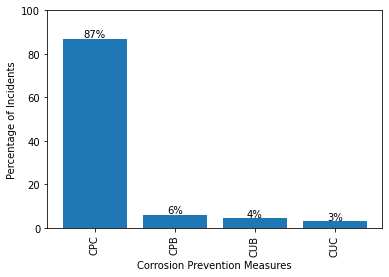

In [756]:
#Stacked bar graph
#cp_percent.plot(kind = 'bar', stacked = True, mark_right = True)

windth = 10
fig, ax = plt.subplots()

a = ax.bar(cp_percent.index,cp_percent.values , align = 'center' ) 

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Corrosion Prevention Measures') 


#y-axis labels 
plt.ylabel('Percentage of Incidents') 
plt.ylim(top=100)


#plot title 
#plt.title('Ditribution of Incidents by Corrosion Prevention Measures') 

#Legend
#plt.legend(['Hoop Stress'],bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\cp_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [757]:
cp_corrosion_ext_percent = incident_df.loc[(incident_df['MAP_CAUSE']=='CORROSION') & (incident_df['MAP_SUBCAUSE']=='EXTERNAL')]['CP_Types'].value_counts(normalize = True)[:]*100
cp_corrosion_ext_percent

CPC    86.764706
CPB     5.882353
CUB     4.411765
CUC     2.941176
Name: CP_Types, dtype: float64

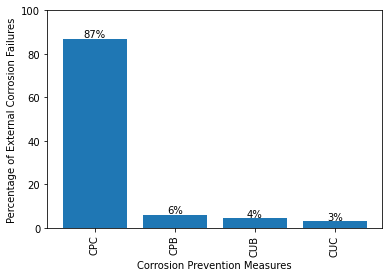

In [758]:
#Stacked bar graph
#cp_corrosion_ext_percent.plot(kind = 'bar', stacked = True, mark_right = True)

windth = 10
fig, ax = plt.subplots()

a = ax.bar(cp_corrosion_ext_percent.index, cp_corrosion_ext_percent.values , align = 'center' ) 

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Corrosion Prevention Measures') 


#y-axis labels 
plt.ylabel('Percentage of External Corrosion Failures') 
plt.ylim(top=100)


#plot title 
#plt.title('Ditribution of Incidents by Corrosion Prevention Measures') 

#Legend
#plt.legend(['Hoop Stress'],bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\cp_corrosion_ext_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [759]:
excavation_d_percent = incident_df.loc[incident_df['MAP_CAUSE']=='EXCAVATION DAMAGE']['Diameter_Range'].value_counts(normalize=True)[:]*100
corrosion_d_percent = incident_df.loc[incident_df['MAP_CAUSE']=='CORROSION']['Diameter_Range'].value_counts(normalize=True)[:]*100
material_d_percent = incident_df.loc[incident_df['MAP_CAUSE']=='MATERIAL/WELD/EQUIP FAILURE']['Diameter_Range'].value_counts(normalize=True)[:]*100
#natural_d_percent = incident_df.loc[incident_df['MAP_CAUSE']=='NATURAL FORCE DAMAGE']['Diameter_Range'].value_counts(normalize=True)[:]*100
#outside_d_percent = incident_df.loc[incident_df['MAP_CAUSE']=='OTHER OUTSIDE FORCE DAMAGE']['Diameter_Range'].value_counts(normalize=True)[:]*100
#other_d_percent = incident_df.loc[incident_df['MAP_CAUSE']=='ALL OTHER CAUSES']['Diameter_Range'].value_counts(normalize=True)[:]*100
#incorrect_d_percent = incident_df.loc[incident_df['MAP_CAUSE']=='INCORRECT OPERATION']['Diameter_Range'].value_counts(normalize=True)[:]*100

In [760]:
#ordering the columns so all data are in the same order
excavation_d_percent = excavation_d_percent[['d<=4', '4<d<=10', '10<d<=20', '20<d<=28', '28<d']]
corrosion_d_percent = corrosion_d_percent[['d<=4', '4<d<=10', '10<d<=20', '20<d<=28', '28<d']]
material_d_percent = material_d_percent[['d<=4', '4<d<=10', '10<d<=20', '20<d<=28', '28<d']]

In [761]:
excavation_d_percent

d<=4        15.753425
4<d<=10     33.561644
10<d<=20    36.986301
20<d<=28     8.904110
28<d         4.794521
Name: Diameter_Range, dtype: float64

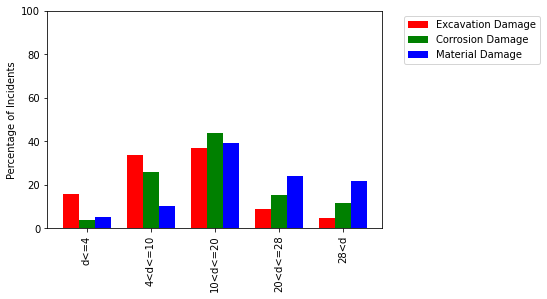

In [762]:
n = len(list(excavation_d_percent.index))
x = np.arange(n)  # the label locations
width = 0.25  # the width of the bars

x_axis = list(excavation_d_percent.index)

fig, ax = plt.subplots()
plt.bar(x , list(excavation_d_percent.values), width, color = 'r', label='Excavation Damage')
plt.bar(x + width, list(corrosion_d_percent.values), width, color = 'g', label='Corrosion Damage')
plt.bar(x + width*2, list(material_d_percent.values), width, color = 'b', label='Material Damage')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Incidents')
ax.set_ylim(top=100)
#ax.set_title('')
plt.xticks(x + width, x_axis, rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\cause_diameter_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')  

plt.show()

In [763]:
excavation_class_percent = incident_df.loc[incident_df['MAP_CAUSE']=='EXCAVATION DAMAGE']['CLASS_LOCATION_TYPE'].value_counts(normalize=True)[:]*100
corrosion_class_percent = incident_df.loc[incident_df['MAP_CAUSE']=='CORROSION']['CLASS_LOCATION_TYPE'].value_counts(normalize=True)[:]*100
material_class_percent = incident_df.loc[incident_df['MAP_CAUSE']=='MATERIAL/WELD/EQUIP FAILURE']['CLASS_LOCATION_TYPE'].value_counts(normalize=True)[:]*100
natural_class_percent = incident_df.loc[incident_df['MAP_CAUSE']=='NATURAL FORCE DAMAGE']['CLASS_LOCATION_TYPE'].value_counts(normalize=True)[:]*100
outside_class_percent = incident_df.loc[incident_df['MAP_CAUSE']=='OTHER OUTSIDE FORCE DAMAGE']['CLASS_LOCATION_TYPE'].value_counts(normalize=True)[:]*100
other_class_percent = incident_df.loc[incident_df['MAP_CAUSE']=='ALL OTHER CAUSES']['CLASS_LOCATION_TYPE'].value_counts(normalize=True)[:]*100
incorrect_class_percent = incident_df.loc[incident_df['MAP_CAUSE']=='INCORRECT OPERATION']['CLASS_LOCATION_TYPE'].value_counts(normalize=True)[:]*100

In [764]:
#adding class 4 location and ordering columns for plotting
excavation_class_percent['CLASS 4 LOCATION'] = 0
corrosion_class_percent['CLASS 4 LOCATION'] = 0
material_class_percent['CLASS 4 LOCATION'] = 0

excavation_class_percent = excavation_class_percent[['CLASS 1 LOCATION', 'CLASS 2 LOCATION', 'CLASS 3 LOCATION', 'CLASS 4 LOCATION']]
corrosion_class_percent =corrosion_class_percent[['CLASS 1 LOCATION', 'CLASS 2 LOCATION', 'CLASS 3 LOCATION', 'CLASS 4 LOCATION']]
material_class_percent= material_class_percent[['CLASS 1 LOCATION', 'CLASS 2 LOCATION', 'CLASS 3 LOCATION', 'CLASS 4 LOCATION']]

In [694]:
excavation_class_percent

CLASS 1 LOCATION    73.239437
CLASS 2 LOCATION     5.633803
CLASS 3 LOCATION    21.126761
CLASS 4 LOCATION     0.000000
Name: CLASS_LOCATION_TYPE, dtype: float64

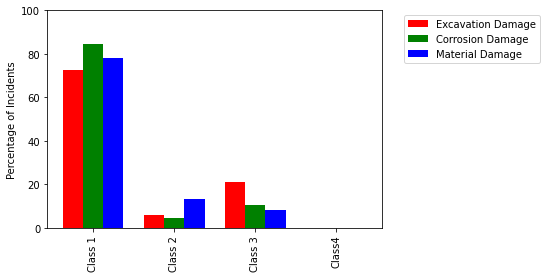

In [818]:
n = len(list(excavation_class_percent.index))
x = np.arange(n)  # the label locations
width = 0.25  # the width of the bars

x_axis = ['Class 1', 'Class 2', 'Class 3', 'Class4']

fig, ax = plt.subplots()
plt.bar(x , list(excavation_class_percent.values), width, color = 'r', label='Excavation Damage')
plt.bar(x + width, list(corrosion_class_percent.values), width, color = 'g', label='Corrosion Damage')
plt.bar(x + width*2, list(material_class_percent.values), width, color = 'b', label='Material Damage')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Incidents')
ax.set_ylim(top=100)
#ax.set_title('')
plt.xticks(x + width, x_axis, rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\cause_class_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')  

plt.show()

In [766]:
excavation_inst_percent = incident_df.loc[incident_df['MAP_CAUSE']=='EXCAVATION DAMAGE']['Installation_Decade'].value_counts(normalize=True)[:]*100
corrosion_inst_percent = incident_df.loc[incident_df['MAP_CAUSE']=='CORROSION']['Installation_Decade'].value_counts(normalize=True)[:]*100
material_inst_percent = incident_df.loc[incident_df['MAP_CAUSE']=='MATERIAL/WELD/EQUIP FAILURE']['Installation_Decade'].value_counts(normalize=True)[:]*100


In [767]:
#adding the missing decades, there should be a better way to do this
excavation_inst_percent['2020s']=0
corrosion_inst_percent['2000s'],corrosion_inst_percent['2010s'], corrosion_inst_percent['2020s']=[0,0,0]
material_inst_percent['2000s'], material_inst_percent['Unknown'], material_inst_percent['2020s']=[0,0,0]

#correcting the order
excavation_inst_percent = excavation_inst_percent[['Pre 1940', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s','2020s' ,'Unknown']]
corrosion_inst_percent = corrosion_inst_percent[['Pre 1940', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s','2020s' ,'Unknown']]
material_inst_percent = material_inst_percent[['Pre 1940', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s','2020s' ,'Unknown']]

In [768]:
excavation_inst_percent

Pre 1940     6.164384
1940s       10.273973
1950s       24.657534
1960s       30.821918
1970s       13.013699
              ...    
1990s        4.109589
2000s        2.054795
2010s        1.369863
2020s        0.000000
Unknown      3.424658
Name: Installation_Decade, Length: 11, dtype: float64

In [769]:
corrosion_inst_percent

Pre 1940    13.333333
1940s       11.428571
1950s       25.714286
1960s       27.619048
1970s        7.619048
              ...    
1990s        2.857143
2000s        0.000000
2010s        0.000000
2020s        0.000000
Unknown      1.904762
Name: Installation_Decade, Length: 11, dtype: float64

In [770]:
material_inst_percent

Pre 1940     4.123711
1940s       22.680412
1950s       30.927835
1960s       23.711340
1970s        9.278351
              ...    
1990s        2.061856
2000s        0.000000
2010s        4.123711
2020s        0.000000
Unknown      0.000000
Name: Installation_Decade, Length: 11, dtype: float64

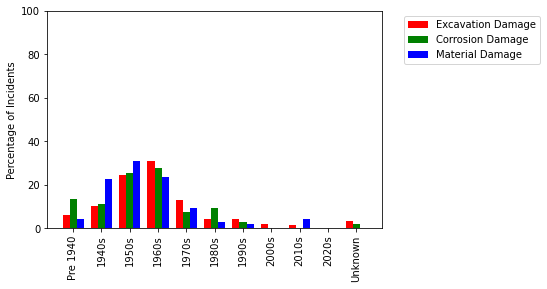

In [771]:
n = len(list(installation_percent.index))
x = np.arange(n)  # the label locations
width = 0.25  # the width of the bars

x_axis = list(installation_percent.index)

fig, ax = plt.subplots()
plt.bar(x , list(excavation_inst_percent.values), width, color = 'r', label='Excavation Damage')
plt.bar(x + width, list(corrosion_inst_percent.values), width, color = 'g', label='Corrosion Damage')
plt.bar(x + width*2, list(material_inst_percent.values), width, color = 'b', label='Material Damage')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Incidents')
ax.set_ylim(top=100)
#ax.set_title('')
plt.xticks(x + width, x_axis, rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\cause_installation_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')  

plt.show()

In [772]:
excavation_commodity_percent = incident_df.loc[incident_df['MAP_CAUSE']=='EXCAVATION DAMAGE']['COMMODITY_RELEASED_TYPE'].value_counts(normalize=True)[:]*100
corrosion_commodity_percent = incident_df.loc[incident_df['MAP_CAUSE']=='CORROSION']['COMMODITY_RELEASED_TYPE'].value_counts(normalize=True)[:]*100
material_commodity_percent = incident_df.loc[incident_df['MAP_CAUSE']=='MATERIAL/WELD/EQUIP FAILURE']['COMMODITY_RELEASED_TYPE'].value_counts(normalize=True)[:]*100

corrosion_commodity_percent['Unknown'] = 0
excavation_commodity_percent['HYDROGEN GAS'], excavation_commodity_percent['OTHER GAS']=[0,0]
material_commodity_percent['HYDROGEN GAS'] = 0

excavation_commodity_percent = excavation_commodity_percent[['NATURAL GAS', 'HYDROGEN GAS', 'OTHER GAS', 'Unknown']]
corrosion_commodity_percent = corrosion_commodity_percent[['NATURAL GAS', 'HYDROGEN GAS', 'OTHER GAS', 'Unknown']]
material_commodity_percent = material_commodity_percent[['NATURAL GAS', 'HYDROGEN GAS', 'OTHER GAS', 'Unknown']]

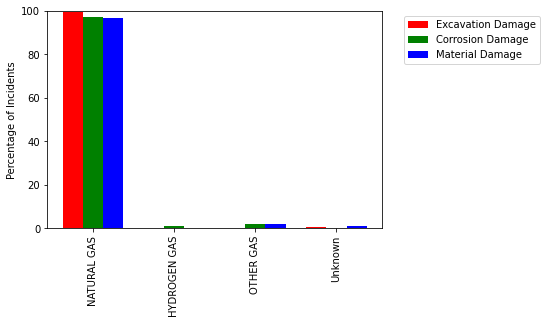

In [773]:
#probably not useful
n = len(list(excavation_commodity_percent.index))
x = np.arange(n)  # the label locations
width = 0.25  # the width of the bars

x_axis = list(excavation_commodity_percent.index)

fig, ax = plt.subplots()
plt.bar(x , list(excavation_commodity_percent.values), width, color = 'r', label='Excavation Damage')
plt.bar(x + width, list(corrosion_commodity_percent.values), width, color = 'g', label='Corrosion Damage')
plt.bar(x + width*2, list(material_commodity_percent.values), width, color = 'b', label='Material Damage')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Incidents')
ax.set_ylim(top=100)
#ax.set_title('')
plt.xticks(x + width, x_axis, rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\cause_commodity_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')  

plt.show()

In [774]:
corrosion_int_commodity_percent = incident_df.loc[(incident_df['MAP_CAUSE']=='CORROSION') & (incident_df['MAP_SUBCAUSE']=='INTERNAL')]['COMMODITY_RELEASED_TYPE'].value_counts(normalize=True)[:]*100
corrosion_ext_commodity_percent = incident_df.loc[(incident_df['MAP_CAUSE']=='CORROSION') & (incident_df['MAP_SUBCAUSE']=='EXTERNAL')]['COMMODITY_RELEASED_TYPE'].value_counts(normalize=True)[:]*100

In [775]:
corrosion_int_commodity_percent['Unknown'] = 0
corrosion_ext_commodity_percent['Unknown'], corrosion_ext_commodity_percent['HYDROGEN GAS'] = [0,0]

corrosion_int_commodity_percent = corrosion_int_commodity_percent[['NATURAL GAS', 'HYDROGEN GAS', 'OTHER GAS', 'Unknown']]
corrosion_ext_commodity_percent = corrosion_ext_commodity_percent[['NATURAL GAS', 'HYDROGEN GAS', 'OTHER GAS', 'Unknown']]

In [776]:
corrosion_int_commodity_percent

NATURAL GAS     93.103448
HYDROGEN GAS     3.448276
OTHER GAS        3.448276
Unknown          0.000000
Name: COMMODITY_RELEASED_TYPE, dtype: float64

In [777]:
corrosion_ext_commodity_percent

NATURAL GAS     98.684211
HYDROGEN GAS     0.000000
OTHER GAS        1.315789
Unknown          0.000000
Name: COMMODITY_RELEASED_TYPE, dtype: float64

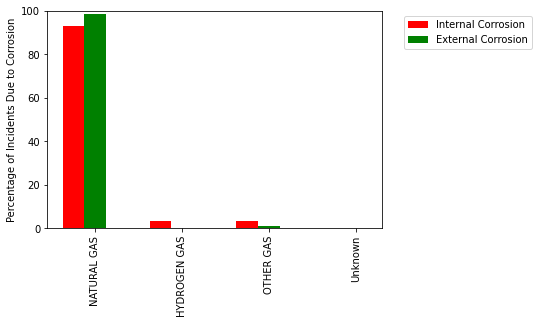

In [778]:
#probably not useful
n = len(list(corrosion_int_commodity_percent.index))
x = np.arange(n)  # the label locations
width = 0.25  # the width of the bars

x_axis = list(corrosion_int_commodity_percent.index)

fig, ax = plt.subplots()
plt.bar(x , list(corrosion_int_commodity_percent.values), width, color = 'r', label='Internal Corrosion')
plt.bar(x + width, list(corrosion_ext_commodity_percent.values), width, color = 'g', label='External Corrosion')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Incidents Due to Corrosion')
ax.set_ylim(top=100)
ax.set_title('')
plt.xticks(x + width, x_axis, rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\cause_commodity_corrosion_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')  

plt.show()

In [779]:
#smys
excavation_smys_percent = incident_df.loc[incident_df['MAP_CAUSE']=='EXCAVATION DAMAGE']['SMYS_Cat'].value_counts(normalize=True)[:]*100
corrosion_smys_percent = incident_df.loc[incident_df['MAP_CAUSE']=='CORROSION']['SMYS_Cat'].value_counts(normalize=True)[:]*100
material_smys_percent = incident_df.loc[incident_df['MAP_CAUSE']=='MATERIAL/WELD/EQUIP FAILURE']['SMYS_Cat'].value_counts(normalize=True)[:]*100

In [780]:
material_smys_percent['Greater than 80%'] = 0
corrosion_smys_percent['Greater than 80%'] = 0
excavation_smys_percent['Greater than 80%'] = 0

excavation_smys_percent= excavation_smys_percent[['Less than 20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-72%', '72%-80%', 'Greater than 80%', 'Unknown']]
corrosion_smys_percent = corrosion_smys_percent[['Less than 20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-72%', '72%-80%', 'Greater than 80%', 'Unknown']]
material_smys_percent = material_smys_percent[['Less than 20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-72%', '72%-80%', 'Greater than 80%', 'Unknown']]

In [781]:
excavation_smys_percent

Less than 20%       15.753425
20%-30%             26.027397
30%-40%             13.013699
40%-50%             15.068493
50%-60%              8.904110
60%-72%             15.068493
72%-80%              1.369863
Greater than 80%     0.000000
Unknown              4.794521
Name: SMYS_Cat, dtype: float64

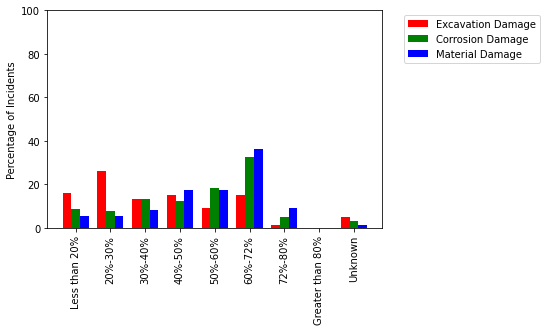

In [782]:
n = len(list(excavation_smys_percent.index))
x = np.arange(n)  # the label locations
width = 0.25  # the width of the bars

x_axis = list(excavation_smys_percent.index)

fig, ax = plt.subplots()
plt.bar(x , list(excavation_smys_percent.values), width, color = 'r', label='Excavation Damage')
plt.bar(x + width, list(corrosion_smys_percent.values), width, color = 'g', label='Corrosion Damage')
plt.bar(x + width*2, list(material_smys_percent.values), width, color = 'b', label='Material Damage')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Incidents')
ax.set_ylim(top=100)
ax.set_title('')
plt.xticks(x + width, x_axis, rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\cause_smys_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')  

plt.show()

In [783]:
#smys_class_1
excavation_smys_class_1_percent = incident_df.loc[(incident_df['MAP_CAUSE']=='EXCAVATION DAMAGE') & (incident_df['CLASS_LOCATION_TYPE']=='CLASS 1 LOCATION')]['SMYS_Cat'].value_counts(normalize=True)[:]*100
corrosion_smys_class_1_percent = incident_df.loc[(incident_df['MAP_CAUSE']=='CORROSION') & (incident_df['CLASS_LOCATION_TYPE']=='CLASS 1 LOCATION')]['SMYS_Cat'].value_counts(normalize=True)[:]*100
material_smys_class_1_percent = incident_df.loc[(incident_df['MAP_CAUSE']=='MATERIAL/WELD/EQUIP FAILURE') & (incident_df['CLASS_LOCATION_TYPE']=='CLASS 1 LOCATION')]['SMYS_Cat'].value_counts(normalize=True)[:]*100

In [784]:
material_smys_class_1_percent['Greater than 80%'] = 0
corrosion_smys_class_1_percent['Greater than 80%'] = 0
excavation_smys_class_1_percent['Greater than 80%'] = 0

excavation_smys_class_1_percent= excavation_smys_class_1_percent[['Less than 20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-72%', '72%-80%', 'Greater than 80%', 'Unknown']]
corrosion_smys_class_1_percent = corrosion_smys_class_1_percent[['Less than 20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-72%', '72%-80%', 'Greater than 80%', 'Unknown']]
material_smys_class_1_percent = material_smys_class_1_percent[['Less than 20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-72%', '72%-80%', 'Greater than 80%', 'Unknown']]

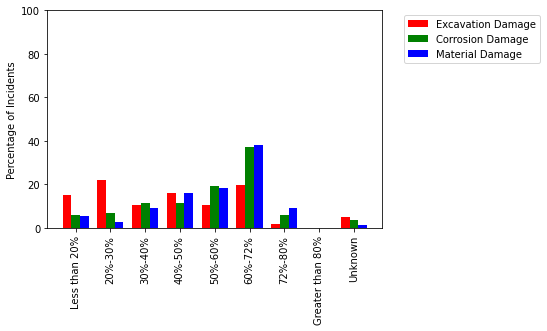

In [785]:
n = len(list(excavation_smys_class_1_percent.index))
x = np.arange(n)  # the label locations
width = 0.25  # the width of the bars

x_axis = list(excavation_smys_class_1_percent.index)

fig, ax = plt.subplots()
plt.bar(x , list(excavation_smys_class_1_percent.values), width, color = 'r', label='Excavation Damage')
plt.bar(x + width, list(corrosion_smys_class_1_percent.values), width, color = 'g', label='Corrosion Damage')
plt.bar(x + width*2, list(material_smys_class_1_percent.values), width, color = 'b', label='Material Damage')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Incidents')
ax.set_ylim(top=100)
ax.set_title('')
plt.xticks(x + width, x_axis, rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\cause_smys_class_1_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')  

plt.show()

In [786]:
#smys_class_2
excavation_smys_class_2_percent = incident_df.loc[(incident_df['MAP_CAUSE']=='EXCAVATION DAMAGE') & (incident_df['CLASS_LOCATION_TYPE']=='CLASS 2 LOCATION')]['SMYS_Cat'].value_counts(normalize=True)[:]*100
corrosion_smys_class_2_percent = incident_df.loc[(incident_df['MAP_CAUSE']=='CORROSION') & (incident_df['CLASS_LOCATION_TYPE']=='CLASS 2 LOCATION')]['SMYS_Cat'].value_counts(normalize=True)[:]*100
material_smys_class_2_percent = incident_df.loc[(incident_df['MAP_CAUSE']=='MATERIAL/WELD/EQUIP FAILURE') & (incident_df['CLASS_LOCATION_TYPE']=='CLASS 2 LOCATION')]['SMYS_Cat'].value_counts(normalize=True)[:]*100

In [787]:
excavation_smys_class_2_percent

40%-50%          33.333333
20%-30%          22.222222
30%-40%          22.222222
Less than 20%    11.111111
60%-72%          11.111111
Name: SMYS_Cat, dtype: float64

In [490]:
#NO PLOTS FOR DIFFERENT CLASSES. NOT USEFUL. NEEDS TO BE Fixed

# excavation_smys_class_2_percent['50%-60%'], excavation_smys_class_2_percent['72%-80%'], excavation_smys_class_2_percent['Greater than 80%'], excavation_smys_class_2_percent['Unknown'] = [0,0,0,0]
# #corrosion_smys_class_2_percent['Greater than 80%'] = 0
# #material_smys_class_2_percent['Greater than 80%'] = 0

# excavation_smys_class_2_percent= excavation_smys_class_2_percent[['Less than 20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-72%', '72%-80%', 'Greater than 80%', 'Unknown']]
# #corrosion_smys_class_2_percent = corrosion_smys_class_2_percent[['Less than 20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-72%', '72%-80%', 'Greater than 80%', 'Unknown']]
# #material_smys_class_2_percent = material_smys_class_2_percent[['Less than 20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-72%', '72%-80%', 'Greater than 80%', 'Unknown']]

In [500]:
# n = len(list(excavation_smys_class_2_percent.index))
# x = np.arange(n)  # the label locations
# width = 0.25  # the width of the bars

# x_axis = list(excavation_smys_class_2_percent.index)

# fig, ax = plt.subplots()
# plt.bar(x , list(excavation_smys_class_2_percent.values), width, color = 'r', label='Excavation Damage')
# #plt.bar(x + width, list(corrosion_smys_class_2_percent.values), width, color = 'g', label='Corrosion Damage')
# #plt.bar(x + width*2, list(material_smys_class_2_percent.values), width, color = 'b', label='Material Damage')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Percentage of Incidents')
# ax.set_ylim(top=100)
# ax.set_title('')
# plt.xticks(x + width, x_axis, rotation = 90)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# #save plot 
# plot_path = os.getcwd() + '\\GT Incidents Plots\\cause_smys_class_2_percent'
# plt.savefig(plot_path, dpi=300,bbox_inches='tight')  

# plt.show()

In [788]:
#smys_class_3
excavation_smys_class_3_percent = incident_df.loc[(incident_df['MAP_CAUSE']=='EXCAVATION DAMAGE') & (incident_df['CLASS_LOCATION_TYPE']=='CLASS 3 LOCATION')]['SMYS_Cat'].value_counts(normalize=True)[:]*100
corrosion_smys_class_3_percent = incident_df.loc[(incident_df['MAP_CAUSE']=='CORROSION') & (incident_df['CLASS_LOCATION_TYPE']=='CLASS 3 LOCATION')]['SMYS_Cat'].value_counts(normalize=True)[:]*100
material_smys_class_3_percent = incident_df.loc[(incident_df['MAP_CAUSE']=='MATERIAL/WELD/EQUIP FAILURE') & (incident_df['CLASS_LOCATION_TYPE']=='CLASS 3 LOCATION')]['SMYS_Cat'].value_counts(normalize=True)[:]*100

In [443]:
# material_smys_class_3_percent['Greater than 80%'] = 0
# corrosion_smys_class_3_percent['Greater than 80%'] = 0
# excavation_smys_class_3_percent['Greater than 80%'] = 0

# excavation_smys_class_3_percent= excavation_smys_class_3_percent[['Less than 20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-72%', '72%-80%', 'Greater than 80%', 'Unknown']]
# corrosion_smys_class_3_percent = corrosion_smys_class_3_percent[['Less than 20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-72%', '72%-80%', 'Greater than 80%', 'Unknown']]
# material_smys_class_3_percent = material_smys_class_3_percent[['Less than 20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-72%', '72%-80%', 'Greater than 80%', 'Unknown']]

In [498]:
# n = len(list(excavation_smys_class_3_percent.index))
# x = np.arange(n)  # the label locations
# width = 0.25  # the width of the bars

# x_axis = list(excavation_smys_class_3_percent.index)

# fig, ax = plt.subplots()
# plt.bar(x , list(excavation_smys_class_3_percent.values), width, color = 'r', label='Excavation Damage')
# plt.bar(x + width, list(corrosion_smys_class_3_percent.values), width, color = 'g', label='Corrosion Damage')
# plt.bar(x + width*2, list(material_smys_class_3_percent.values), width, color = 'b', label='Material Damage')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Percentage of Incidents')
# ax.set_ylim(top=100)
# ax.set_title('')
# plt.xticks(x + width, x_axis, rotation = 90)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# #save plot 
# plot_path = os.getcwd() + '\\GT Incidents Plots\\cause_smys_class_3_percent'
# plt.savefig(plot_path, dpi=300,bbox_inches='tight')  

# plt.show()

In [789]:
#smys_class_4
excavation_smys_class_4_percent = incident_df.loc[(incident_df['MAP_CAUSE']=='EXCAVATION DAMAGE') & (incident_df['CLASS_LOCATION_TYPE']=='CLASS 4 LOCATION')]['SMYS_Cat'].value_counts(normalize=True)[:]*100
corrosion_smys_class_4_percent = incident_df.loc[(incident_df['MAP_CAUSE']=='CORROSION') & (incident_df['CLASS_LOCATION_TYPE']=='CLASS 4 LOCATION')]['SMYS_Cat'].value_counts(normalize=True)[:]*100
material_smys_class_4_percent = incident_df.loc[(incident_df['MAP_CAUSE']=='MATERIAL/WELD/EQUIP FAILURE') & (incident_df['CLASS_LOCATION_TYPE']=='CLASS 4 LOCATION')]['SMYS_Cat'].value_counts(normalize=True)[:]*100

In [496]:
# material_smys_class_4_percent['Greater than 80%'] = 0
# corrosion_smys_class_4_percent['Greater than 80%'] = 0
# excavation_smys_class_4_percent['Greater than 80%'] = 0

# excavation_smys_class_4_percent= excavation_smys_class_4_percent[['Less than 20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-72%', '72%-80%', 'Greater than 80%', 'Unknown']]
# corrosion_smys_class_4_percent = corrosion_smys_class_4_percent[['Less than 20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-72%', '72%-80%', 'Greater than 80%', 'Unknown']]
# material_smys_class_4_percent = material_smys_class_4_percent[['Less than 20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-72%', '72%-80%', 'Greater than 80%', 'Unknown']]

In [499]:
# n = len(list(excavation_smys_class_4_percent.index))
# x = np.arange(n)  # the label locations
# width = 0.25  # the width of the bars

# x_axis = list(excavation_smys_class_4_percent.index)

# fig, ax = plt.subplots()
# plt.bar(x , list(excavation_smys_class_4_percent.values), width, color = 'r', label='Excavation Damage')
# plt.bar(x + width, list(corrosion_smys_class_4_percent.values), width, color = 'g', label='Corrosion Damage')
# plt.bar(x + width*2, list(material_smys_class_4_percent.values), width, color = 'b', label='Material Damage')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Percentage of Incidents')
# ax.set_ylim(top=100)
# ax.set_title('')
# plt.xticks(x + width, x_axis, rotation = 90)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# #save plot 
# plot_path = os.getcwd() + '\\GT Incidents Plots\\cause_smys_class_4_percent'
# plt.savefig(plot_path, dpi=300,bbox_inches='tight')  

# plt.show()

In [790]:
#Consequences
release_type = incident_df['RELEASE_TYPE'].value_counts()
release_type

LEAK                   146
RUPTURE                136
MECHANICAL PUNCTURE    121
OTHER                   23
Name: RELEASE_TYPE, dtype: int64

In [791]:
#Consequences
release_type_percent = incident_df['RELEASE_TYPE'].value_counts(normalize=True)[:]*100
release_type_percent

LEAK                   34.272300
RUPTURE                31.924883
MECHANICAL PUNCTURE    28.403756
OTHER                   5.399061
Name: RELEASE_TYPE, dtype: float64

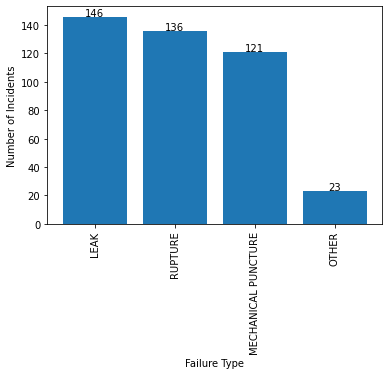

In [819]:
#Stacked bar graph
#release_type.plot(kind = 'bar', stacked = True, mark_right = True)

windth = 10
fig, ax = plt.subplots()

a = ax.bar(release_type.index,release_type.values , align = 'center' ) 

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Failure Type') 


#y-axis labels 
plt.ylabel('Number of Incidents') 
#plt.ylim(top=100)


#plot title 
#plt.title('Number of Incidents by Release Type') 

#Legend
#plt.legend(['Release Type'],bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\Release_type'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [823]:
list(release_type_percent.index)

['LEAK', 'RUPTURE', 'MECHANICAL PUNCTURE', 'OTHER']

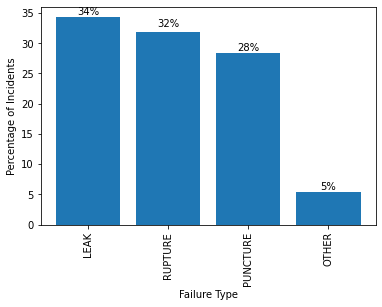

In [828]:
#Stacked bar graph
#release_type.plot(kind = 'bar', stacked = True, mark_right = True)

n=len(release_type_percent.index)
x = np.arange(n)
labels = ['LEAK', 'RUPTURE', 'PUNCTURE', 'OTHER']

windth = 10
fig, ax = plt.subplots()

a = ax.bar(x, release_type_percent.values , align = 'center' ) 

#xticks 
plt.xticks(x, labels,rotation=90) 

#x-axis labels 
plt.xlabel('Failure Type') 


#y-axis labels 
plt.ylabel('Percentage of Incidents') 
#plt.ylim(top=100)


#plot title 
#plt.title('Distribution of Incidents by Release Type') 

#Legend
#plt.legend(['Release Type'],bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
#plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\Release_type_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

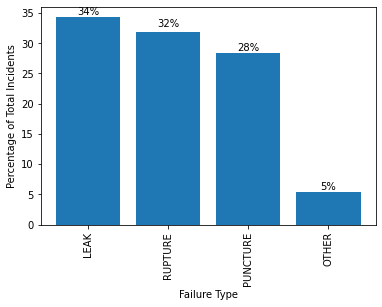

In [829]:
#Stacked bar graph
#release_type_percent.plot(kind = 'bar', stacked = True, mark_right = True)

n=len(release_type_percent.index)
x = np.arange(n)
labels = ['LEAK', 'RUPTURE', 'PUNCTURE', 'OTHER']

windth = 10
fig, ax = plt.subplots()

a = ax.bar(x,release_type_percent.values , align = 'center' ) 

#xticks 
plt.xticks(x, labels, rotation=90) 

#x-axis labels 
plt.xlabel('Failure Type') 


#y-axis labels 
plt.ylabel('Percentage of Total Incidents') 
#plt.ylim(top=100)


#plot title 
#plt.title('Ditribution of Incidents by Release Type') 

#Legend
#plt.legend(['Release Type'],bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\Release_type_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [834]:
cause_release_type = pd.DataFrame()

cause_release_type['NATURAL FORCE'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'NATURAL FORCE DAMAGE']['RELEASE_TYPE'].value_counts(normalize=True)[:]*100

cause_release_type['CORROSION'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'CORROSION']['RELEASE_TYPE'].value_counts(normalize=True)[:]*100
cause_release_type['MATERIAL FAILURE'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE']['RELEASE_TYPE'].value_counts(normalize=True)[:]*100
cause_release_type['ALL OTHER CAUSES'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'ALL OTHER CAUSES']['RELEASE_TYPE'].value_counts(normalize=True)[:]*100
cause_release_type['OTHER OUTSIDE FORCE'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'OTHER OUTSIDE FORCE DAMAGE']['RELEASE_TYPE'].value_counts(normalize=True)[:]*100
cause_release_type['EXCAVATION DAMAGE'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'EXCAVATION DAMAGE']['RELEASE_TYPE'].value_counts(normalize=True)[:]*100
cause_release_type['INCORRECT OPERATION'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'INCORRECT OPERATION']['RELEASE_TYPE'].value_counts(normalize=True)[:]*100

In [836]:
cause_release_type = cause_release_type[['EXCAVATION DAMAGE', 'CORROSION', 'MATERIAL FAILURE', 'NATURAL FORCE', 'OTHER OUTSIDE FORCE', 'INCORRECT OPERATION', 'ALL OTHER CAUSES']]

In [837]:
cause_release_type.T

,RUPTURE,LEAK,OTHER,MECHANICAL PUNCTURE
EXCAVATION DAMAGE,10.958904,4.794521,6.164384,78.082192
CORROSION,43.809524,56.190476,NaN,NaN
MATERIAL FAILURE,51.546392,45.360825,3.092784,NaN
NATURAL FORCE,43.333333,40.000000,10.000000,6.666667
OTHER OUTSIDE FORCE,31.818182,40.909091,13.636364,13.636364
INCORRECT OPERATION,12.500000,50.000000,25.000000,12.500000
ALL OTHER CAUSES,16.666667,61.111111,16.666667,5.555556


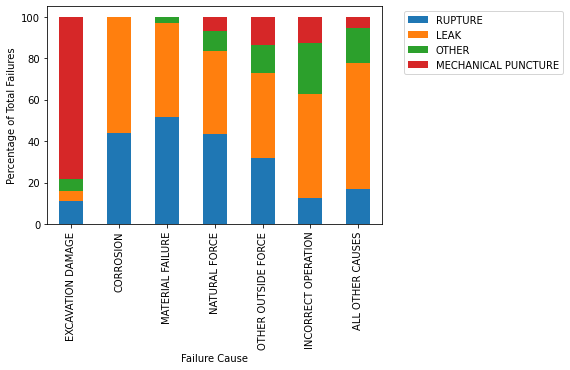

In [848]:
#Stacked bar graph
cause_release_type.T.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Failure Cause') 


#y-axis labels 
plt.ylabel('Percentage of Total Failures') 


#plot title 
#plt.title('Ditribution of Incidents by Release Type') 

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
#for n in df_diameter_short_percent:
    #for i, (cs, ab, pc) in enumerate(zip(df_diameter_short_percent.cumsum(1)[n], df_diameter_short_percent[n], df_diameter_short_percent[n])):
        #plt.text(i, cs - ab / 2, str(np.round(pc, 1)) + '%', 
                 #va = 'center', ha = 'center', rotation = 90, fontsize = 7)

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\cause_release_type_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [797]:
incident_df['ign_expl'] = None
incident_df.loc[(incident_df['IGNITE_IND'] == 'YES') & (incident_df['EXPLODE_IND'] == 'NO'),'ign_expl'] = 'Ignited Only'
incident_df.loc[(incident_df['IGNITE_IND'] == 'YES') & (incident_df['EXPLODE_IND'] == 'YES'),'ign_expl'] = 'Explosion'
incident_df.loc[(incident_df['IGNITE_IND'] == 'NO'),'ign_expl'] = 'Not Ignited'


In [798]:
ign_expl_percent = incident_df['ign_expl'].value_counts(normalize=True)[:]*100
ign_expl_percent.values

array([85.21126761,  8.68544601,  6.10328638])

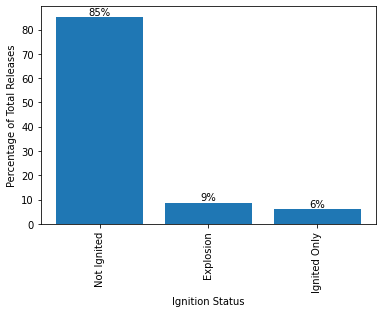

In [799]:
#Stacked bar graph
#ign_expl_percent.plot(kind = 'bar', stacked = True, mark_right = True)

windth = 10
fig, ax = plt.subplots()

a = ax.bar(ign_expl_percent.index,ign_expl_percent.values , align = 'center' ) 

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Ignition Status') 


#y-axis labels 
plt.ylabel('Percentage of Total Releases') 
#plt.ylim(top=100)


#plot title 
plt.title('') 

#Legend
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
plt.xticks(rotation=90)  
for n in a:
   height = round(n.get_height())
   plt.text(x=n.get_x() + n.get_width() / 2, y=height+.70, s="{}%".format(height), ha='center')

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\ignition_explosion_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [839]:
release_type_ignition = pd.DataFrame()

release_type_ignition['LEAK'] = None
release_type_ignition['RUPTURE'] = None
release_type_ignition['PUNCTURE'] = None
release_type_ignition['OTHER'] = None

#need to make sure the first one includes all types (ignition results/rows)
release_type_ignition['RUPTURE'] = incident_df.loc[incident_df['RELEASE_TYPE'] == 'RUPTURE']['ign_expl'].value_counts(normalize=True)[:]*100

release_type_ignition['LEAK'] = incident_df.loc[incident_df['RELEASE_TYPE'] == 'LEAK']['ign_expl'].value_counts(normalize=True)[:]*100
release_type_ignition['PUNCTURE'] = incident_df.loc[incident_df['RELEASE_TYPE'] == 'MECHANICAL PUNCTURE']['ign_expl'].value_counts(normalize=True)[:]*100
release_type_ignition['OTHER'] = incident_df.loc[incident_df['RELEASE_TYPE'] == 'OTHER']['ign_expl'].value_counts(normalize=True)[:]*100


In [840]:
release_type_ignition.T

,Not Ignited,Explosion,Ignited Only
LEAK,96.575342,NaN,3.424658
RUPTURE,66.911765,22.058824,11.029412
PUNCTURE,91.735537,4.958678,3.305785
OTHER,86.956522,4.347826,8.695652


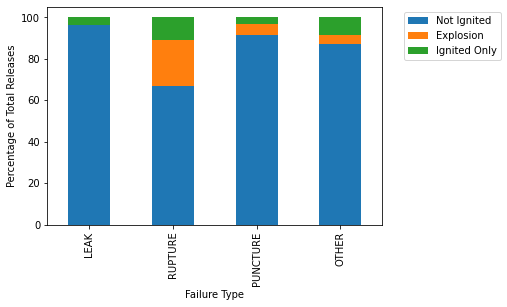

In [841]:
#Stacked bar graph
release_type_ignition.T.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Failure Type') 


#y-axis labels 
plt.ylabel('Percentage of Total Releases') 


#plot title 
#plt.title('Ditribution of Releases by Ignition Status') 

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
#for n in df_diameter_short_percent:
    #for i, (cs, ab, pc) in enumerate(zip(df_diameter_short_percent.cumsum(1)[n], df_diameter_short_percent[n], df_diameter_short_percent[n])):
        #plt.text(i, cs - ab / 2, str(np.round(pc, 1)) + '%', 
                 #va = 'center', ha = 'center', rotation = 90, fontsize = 7)

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\release_ignition_explosion_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [842]:
cause_ignition_status = pd.DataFrame()

cause_ignition_status['NATURAL FORCE'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'NATURAL FORCE DAMAGE']['ign_expl'].value_counts(normalize=True)[:]*100

cause_ignition_status['CORROSION'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'CORROSION']['ign_expl'].value_counts(normalize=True)[:]*100
cause_ignition_status['MATERIAL FAILURE'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'MATERIAL/WELD/EQUIP FAILURE']['ign_expl'].value_counts(normalize=True)[:]*100
cause_ignition_status['ALL OTHER CAUSES'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'ALL OTHER CAUSES']['ign_expl'].value_counts(normalize=True)[:]*100
cause_ignition_status['OTHER OUTSIDE FORCE'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'OTHER OUTSIDE FORCE DAMAGE']['ign_expl'].value_counts(normalize=True)[:]*100
cause_ignition_status['EXCAVATION DAMAGE'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'EXCAVATION DAMAGE']['ign_expl'].value_counts(normalize=True)[:]*100
cause_ignition_status['INCORRECT OPERATION'] = incident_df.loc[incident_df['MAP_CAUSE'] == 'INCORRECT OPERATION']['ign_expl'].value_counts(normalize=True)[:]*100

In [846]:
cause_ignition_status = cause_ignition_status[['EXCAVATION DAMAGE', 'CORROSION', 'MATERIAL FAILURE', 'NATURAL FORCE', 'OTHER OUTSIDE FORCE', 'INCORRECT OPERATION', 'ALL OTHER CAUSES']]

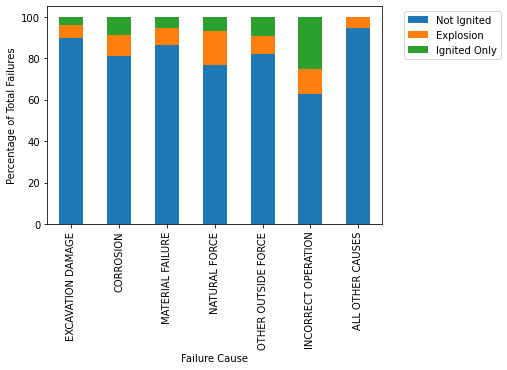

In [847]:
#Stacked bar graph
cause_ignition_status.T.plot(kind = 'bar', stacked = True, mark_right = True)

#xticks 
plt.xticks(rotation=90) 

#x-axis labels 
plt.xlabel('Failure Cause') 


#y-axis labels 
plt.ylabel('Percentage of Total Failures') 


#plot title 
#plt.title('Ditribution of Incidents by Ignition Status') 

#Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#adding Percentage values on the graph
#for n in df_diameter_short_percent:
    #for i, (cs, ab, pc) in enumerate(zip(df_diameter_short_percent.cumsum(1)[n], df_diameter_short_percent[n], df_diameter_short_percent[n])):
        #plt.text(i, cs - ab / 2, str(np.round(pc, 1)) + '%', 
                 #va = 'center', ha = 'center', rotation = 90, fontsize = 7)

#save plot 
plot_path = os.getcwd() + '\\GT Incidents Plots\\cause_ignition_status_percent'
plt.savefig(plot_path, dpi=300,bbox_inches='tight')         
        
#display 
plt.show();

In [807]:
incident_df.to_csv('incident_df_gt.csv')

In [806]:
incident_df

,DATAFILE_AS_OF,SIGNIFICANT,SERIOUS,SYSTEM_TYPE,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_RECEIVED_DATE,REPORT_TYPE,OPERATOR_ID,NAME,...,AUTHORIZER_EMAIL,NARRATIVE,Installation_Decade,Diameter_Range,SMYS_Range,Hoop_Stress,SMYS%,SMYS_Cat,CP_Types,ign_expl
IYEAR,,,,,,,,,,,,,,,,,,,,,
2010,2021-11-30 10:22:41,YES,NO,GT (Gas Transmission),20100002,15077,2010-03-12 14:42:51,SUPPLEMENTAL FINAL,18516,SOUTHERN NATURAL GAS CO,...,ken.peters@elpaso.com,ON JANUARY 6 2010 SOUTHERN NATURAL GAS (SNG) C...,1950s,20<d<=28,None,36000.000000,0.692308,60%-72%,CPC,Not Ignited
2010,2021-11-30 10:22:41,YES,NO,GT (Gas Transmission),20100008,15033,2010-03-31 13:10:18,SUPPLEMENTAL FINAL,4280,EL PASO NATURAL GAS CO,...,ken.peters@elpaso.com,AN ANOMALY INDICATION FROM AN ILI RUN WAS BEIN...,1960s,28<d,None,28938.356164,0.556507,50%-60%,None,Not Ignited
2010,2021-11-30 10:22:41,NO,NO,GT (Gas Transmission),20100012,15129,2010-04-07 11:27:09,SUPPLEMENTAL FINAL,1007,KM INTERSTATE GAS TRANSMISSION CO,...,bruce_hancock@kindermorgan.com,A METALLURGICAL ANALYSIS OF THE FAILURE WAS CO...,1940s,10<d<=20,None,23040.000000,0.658286,60%-72%,None,Not Ignited
2010,2021-11-30 10:22:41,YES,NO,GT (Gas Transmission),20100013,15036,2010-04-08 11:26:14,SUPPLEMENTAL FINAL,12696,CYPRESS GAS PIPELINE COMPANY,...,ngray@eprod.com,"ON MARCH 22, 2010, LOCAL OPERATING PERSONNEL W...",1950s,10<d<=20,None,21000.000000,0.500000,40%-50%,CPC,Not Ignited
2010,2021-11-30 10:22:41,YES,NO,GT (Gas Transmission),20100014,17098,2010-04-09 17:54:38,SUPPLEMENTAL FINAL,31286,"ONEOK GAS TRANSPORTATION, LLC",...,wesley.dunbar@oneok.com,ONEOK GAS TRANPORTATION A-26 26INCH PIPELINE R...,1950s,20<d<=28,None,31200.000000,0.600000,50%-60%,CPC,Ignited Only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,2021-11-30 10:22:41,YES,NO,GT (Gas Transmission),20200128,35171,2020-11-24 12:22:19,SUPPLEMENTAL FINAL,31159,"KANSAS GAS SERVICE COMPANY, A DIVISION OF ONE ...",...,randalrandy.spector@onegas.com,A 3RD PARTY CONTRACTOR MOVING DIRT WITH A SCRA...,1950s,4<d<=10,None,4357.594937,0.181566,Less than 20%,None,Not Ignited
2020,2021-11-30 10:22:41,YES,NO,GT (Gas Transmission),20200134,35049,2020-12-28 21:30:34,SUPPLEMENTAL FINAL,4900,KINDER MORGAN TEJAS PIPELINE,...,jaime_hernandez@kindermorgan.com,"ON DECEMBER 4, 2020 AT APPROXIMATELY 15:00 HRS...",1980s,10<d<=20,None,20884.500000,0.401625,40%-50%,CPC,Not Ignited
2020,2021-11-30 10:22:41,YES,NO,GT (Gas Transmission),20210003,35195,2021-01-08 16:31:24,SUPPLEMENTAL FINAL,15518,PIEDMONT NATURAL GAS CO INC,...,farris.berry@duke-energy.com,A THIRD-PARTY CONTRACTOR WAS REPLACING A BRIDG...,2000s,4<d<=10,None,15625.000000,0.372024,30%-40%,None,Not Ignited
